### Importing Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

C:\Users\user\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# import data
data=pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")
data

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

## Data Preprocessing

### Checking Missing Values

In [3]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

##### There is no missing values.

### Checking Outliers

In [4]:
out = data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18)) 
plotno = 1

for column in out: 
    if plotno<=12:    
        plt.subplot(4,3,plotno) 
        sns.boxplot(out[column]) 
        plt.xlabel(column,fontsize=20)  
    plotno+=1 
plt.tight_layout()
plt.show() 

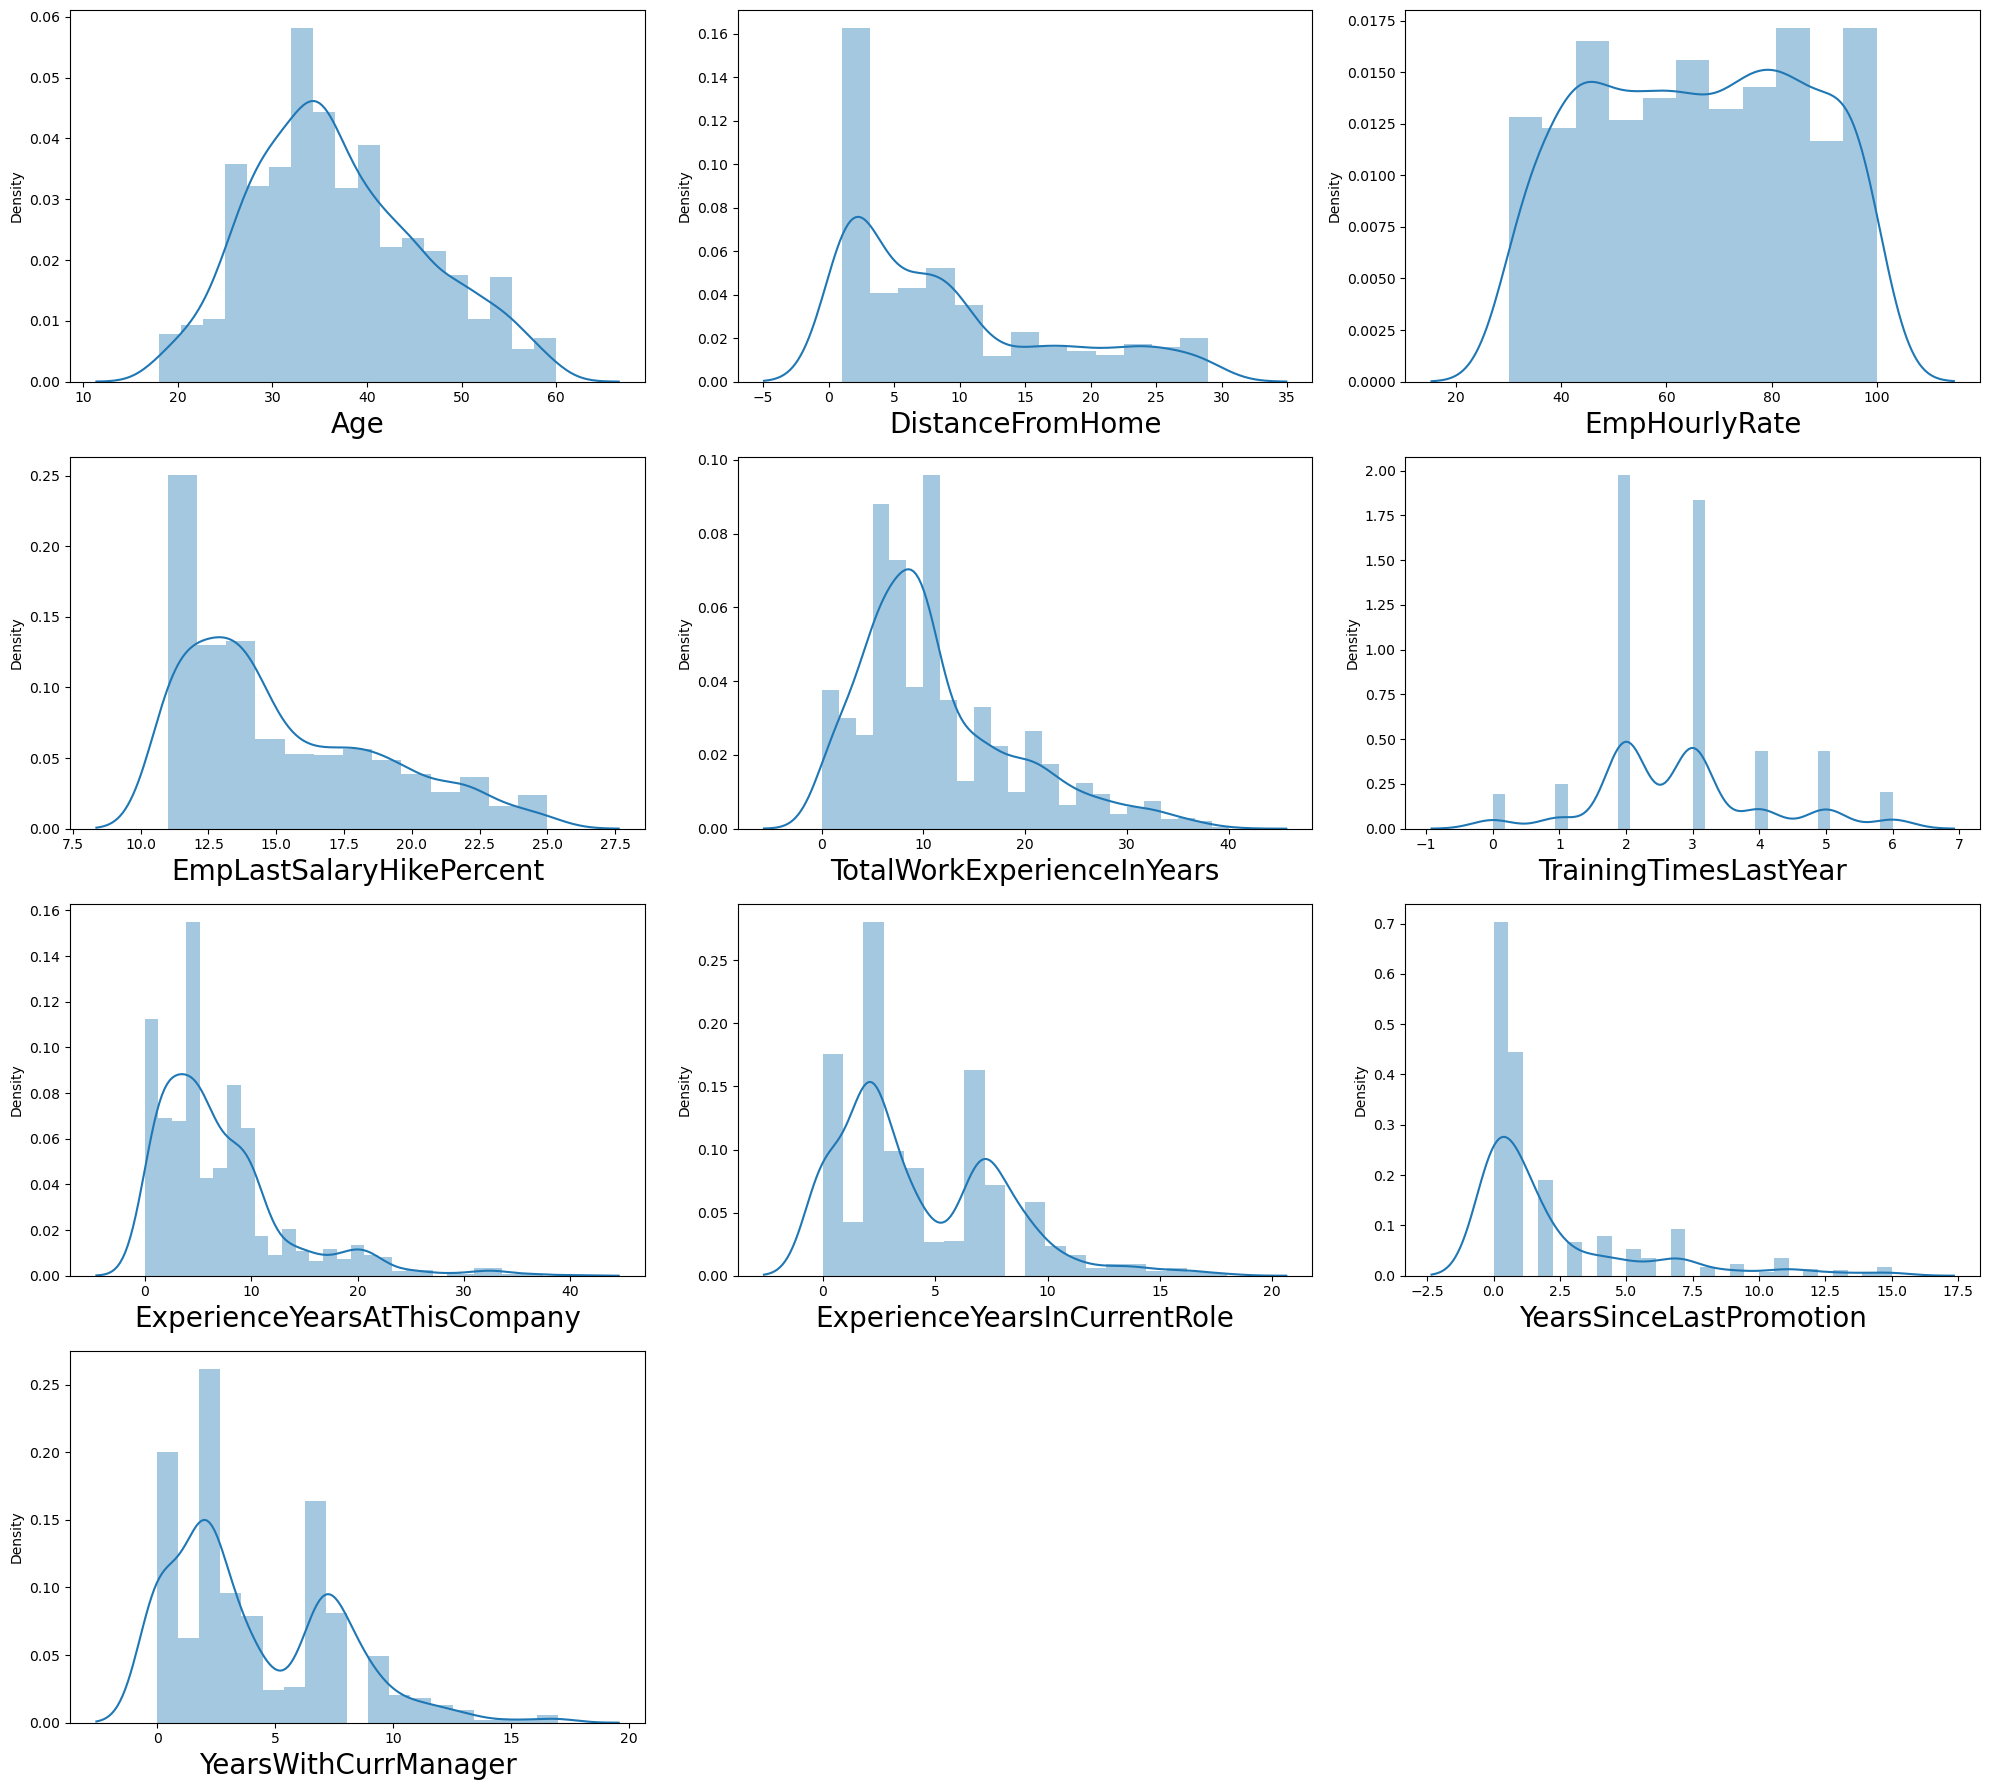

In [5]:
#Checking distribution
out = data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18)) 
plotno = 1

for column in out: 
    if plotno<=12:    
        plt.subplot(4,3,plotno) 
        sns.distplot(out[column]) 
        plt.xlabel(column,fontsize=20)  
    plotno+=1 
plt.tight_layout()
plt.show() 

### IQR

#### TrainingTimesLastYear

In [6]:
iqr = stats.iqr(data['TrainingTimesLastYear'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['TrainingTimesLastYear'].quantile(0.25)  # first quantile
Q3 = data['TrainingTimesLastYear'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 1.0
minimum limit 0.5
maximum limit 4.5


In [7]:
data.loc[data['TrainingTimesLastYear'] > max_limit,'TrainingTimesLastYear'] = data['TrainingTimesLastYear'].median()

In [8]:
data.loc[data['TrainingTimesLastYear'] < min_limit,'TrainingTimesLastYear'] = data['TrainingTimesLastYear'].median()

<Axes: xlabel='TrainingTimesLastYear'>

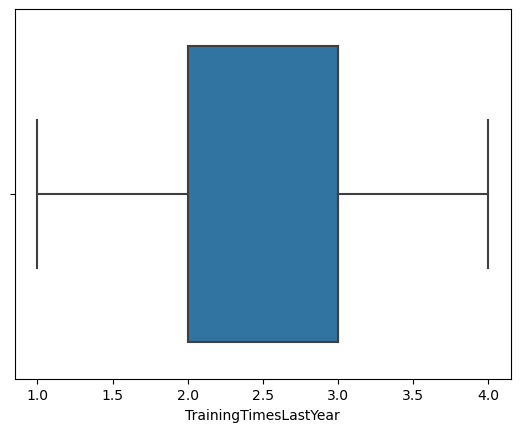

In [9]:
sns.boxplot(x="TrainingTimesLastYear",data=data)

#### ExperienceYearsInCurrentRole

In [10]:
iqr = stats.iqr(data['ExperienceYearsInCurrentRole'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['ExperienceYearsInCurrentRole'].quantile(0.25)  # first quantile
Q3 = data['ExperienceYearsInCurrentRole'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 5.0
minimum limit -5.5
maximum limit 14.5


In [11]:
data.loc[data['ExperienceYearsInCurrentRole'] > max_limit,'ExperienceYearsInCurrentRole'] = data['ExperienceYearsInCurrentRole'].median()

<Axes: xlabel='ExperienceYearsInCurrentRole'>

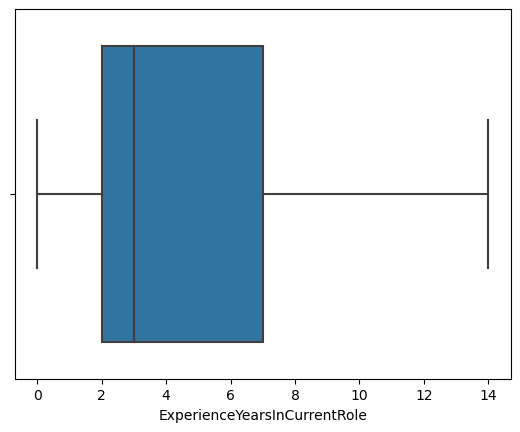

In [12]:
sns.boxplot(x="ExperienceYearsInCurrentRole",data=data)

#### YearsWithCurrManager

In [13]:
iqr = stats.iqr(data['YearsWithCurrManager'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['YearsWithCurrManager'].quantile(0.25)  # first quantile
Q3 = data['YearsWithCurrManager'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 5.0
minimum limit -5.5
maximum limit 14.5


In [14]:
data.loc[data['YearsWithCurrManager'] > max_limit,'YearsWithCurrManager'] = data['YearsWithCurrManager'].median()

In [15]:
sns.boxplot(x="YearsWithCurrManager",data=data)

<Axes: xlabel='YearsWithCurrManager'>

**Converting PerformanceRating into binary as it is our Target feature**

- '1' represents Performing employees

- '0' represents not performing employess

In [16]:
data.PerformanceRating.replace([3,4],'1',inplace=True)
data.PerformanceRating.replace([2],'0',inplace=True)

**Convert gender to numerical**

In [17]:
gender_mapping = {'Male': 1, 'Female': 2}

# Map the values in the 'Gender' column using the dictionary
data['Gender'] = data['Gender'].map(gender_mapping)

**Using label encoder to convert the categorical data to numerical data¶**

In [18]:
## Using label encoder to convert the categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data.EducationBackground=lc.fit_transform(data.EducationBackground)
data.MaritalStatus=lc.fit_transform(data.MaritalStatus)
data.EmpDepartment=lc.fit_transform(data.EmpDepartment)
data.EmpJobRole=lc.fit_transform(data.EmpJobRole)
data.BusinessTravelFrequency=lc.fit_transform(data.BusinessTravelFrequency)
data.OverTime=lc.fit_transform(data.OverTime)
data.Attrition=lc.fit_transform(data.Attrition)

In [19]:
data.head()

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0  E1001000   32       1                    2              2              5   
1  E1001006   47       1                    2              2              5   
2  E1001007   40       1                    1              1              5   
3  E1001009   41       1                    0              0              3   
4  E1001010   60       1                    2              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2                10                  3   
1          13                        2                14                  4   
2          13                        1                 5                  4   
3           8                        2                10                  4   
4          13                        2                16                  4   

   ...  EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0  ...                            4                          10   
1  ...                            4                          20   
2  ...                            3                          20   
3  ...                            2                          23   
4  ...                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                       12   
4                             2                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                     8          0                  1  
1                     7          0                  1  
2                    12          0                  1  
3                     6          0                  1  
4                     2          0                  1  

[5 rows x 28 columns]

In [20]:
data=data.reindex(columns=['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
      'YearsWithCurrManager', 'Attrition', 'PerformanceRating'])

## Feature Scaling

### MinMaxScaler

In [22]:
##Saling data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['Age','Gender','EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole','BusinessTravelFrequency','DistanceFromHome','EmpEducationLevel','EmpEnvironmentSatisfaction','EmpHourlyRate','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction','NumCompaniesWorked','OverTime','EmpLastSalaryHikePercent','EmpRelationshipSatisfaction','TotalWorkExperienceInYears','TrainingTimesLastYear','EmpWorkLifeBalance','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager', 'Attrition','PerformanceRating']]=scale.fit_transform(data[['Age','Gender','EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole','BusinessTravelFrequency','DistanceFromHome','EmpEducationLevel','EmpEnvironmentSatisfaction','EmpHourlyRate','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction','NumCompaniesWorked', 'OverTime','EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction','TotalWorkExperienceInYears', 'TrainingTimesLastYear','EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager', 'Attrition','PerformanceRating']])

In [23]:
data.head()

EmpNumber       Age  Gender  EducationBackground  MaritalStatus  \
0  E1001000  0.333333     0.0                  0.4            1.0   
1  E1001006  0.690476     0.0                  0.4            1.0   
2  E1001007  0.523810     0.0                  0.2            0.5   
3  E1001009  0.547619     0.0                  0.0            0.0   
4  E1001010  1.000000     0.0                  0.4            1.0   

   EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
0            1.0    0.722222                      1.0          0.321429   
1            1.0    0.722222                      1.0          0.464286   
2            1.0    0.722222                      0.5          0.142857   
3            0.6    0.444444                      1.0          0.321429   
4            1.0    0.722222                      1.0          0.535714   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0               0.50  ...                     1.000000   
1               0.75  ...                     1.000000   
2               0.75  ...                     0.666667   
3               0.75  ...                     0.333333   
4               0.75  ...                     1.000000   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                       0.250               0.333333            0.333333   
1                       0.500               0.333333            0.666667   
2                       0.500               0.333333            0.666667   
3                       0.575               0.333333            0.333333   
4                       0.250               0.000000            0.666667   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                         0.250                      0.500000   
1                         0.175                      0.500000   
2                         0.450                      0.928571   
3                         0.525                      0.428571   
4                         0.050                      0.142857   

   YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                 0.000000              0.571429        0.0                1.0  
1                 0.066667              0.500000        0.0                1.0  
2                 0.066667              0.857143        0.0                1.0  
3                 0.800000              0.428571        0.0                1.0  
4                 0.133333              0.142857        0.0                1.0  

[5 rows x 28 columns]

#### We can drop EmpNumber because it doesn't affect our target value.

In [24]:
data.drop(['EmpNumber'],axis=1,inplace=True)

## Cheking Correlation

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [26]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [27]:
corr_features=correlation(data,0.9)
len(set(corr_features))

0

#### No attributes shows high correlation.

## Feature importance:

In [28]:
#defining X and y 
X=data.iloc[0:,:-1]  #except the Target feature all are taken
y=data.PerformanceRating #only the target feature is taken

In [29]:
#Finding out the best feature which will contribute and have good relation with target variable.
from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(X, y)

ExtraTreesClassifier()

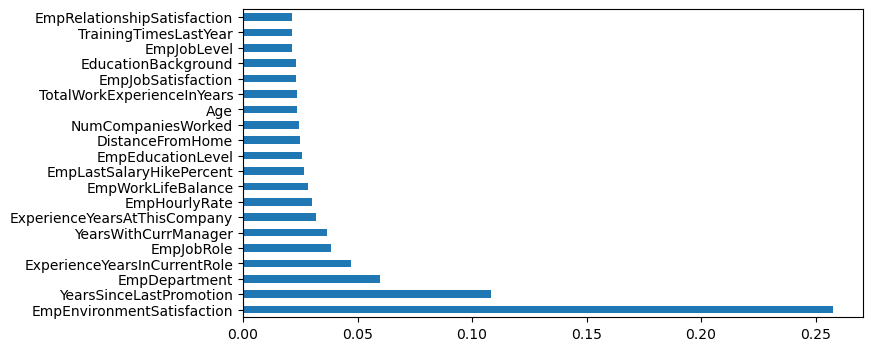

In [30]:
#plot graph of important features for better visualization
plt.figure(figsize = (8,4))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

#### The most important features are EmpEnvironmentSatisfaction followed by YearsSinceLastPromotion and EmpDepartment.

## Save Preproecced Data

In [31]:
data.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0  0.333333     0.0                  0.4            1.0            1.0   
1  0.690476     0.0                  0.4            1.0            1.0   
2  0.523810     0.0                  0.2            0.5            1.0   
3  0.547619     0.0                  0.0            0.0            0.6   
4  1.000000     0.0                  0.4            1.0            1.0   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0    0.722222                      1.0          0.321429               0.50   
1    0.722222                      1.0          0.464286               0.75   
2    0.722222                      0.5          0.142857               0.75   
3    0.444444                      1.0          0.321429               0.75   
4    0.722222                      1.0          0.535714               0.75   

   EmpEnvironmentSatisfaction  ...  EmpRelationshipSatisfaction  \
0                    1.000000  ...                     1.000000   
1                    1.000000  ...                     1.000000   
2                    1.000000  ...                     0.666667   
3                    0.333333  ...                     0.333333   
4                    0.000000  ...                     1.000000   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                       0.250               0.333333            0.333333   
1                       0.500               0.333333            0.666667   
2                       0.500               0.333333            0.666667   
3                       0.575               0.333333            0.333333   
4                       0.250               0.000000            0.666667   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                         0.250                      0.500000   
1                         0.175                      0.500000   
2                         0.450                      0.928571   
3                         0.525                      0.428571   
4                         0.050                      0.142857   

   YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                 0.000000              0.571429        0.0                1.0  
1                 0.066667              0.500000        0.0                1.0  
2                 0.066667              0.857143        0.0                1.0  
3                 0.800000              0.428571        0.0                1.0  
4                 0.133333              0.142857        0.0                1.0  

[5 rows x 27 columns]

In [32]:
data.to_csv('Preprocessed_data.csv')